## 第一步 从tushare中任意获取一股票

## 第二步 构建通道突破策略

## 第三步 比较20日和40日的通道突破策略的获胜率

## 注意：模型有好有坏，不必介意，重要的是掌握过程

Duplicate key in file WindowsPath('D:/anaconda/conda/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 789 ('font.family         : sans-serif')
Duplicate key in file WindowsPath('D:/anaconda/conda/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 790 ('font.sans-serif         : SimHei')
Duplicate key in file WindowsPath('D:/anaconda/conda/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 791 ('axes.unicode_minus  : False')


本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


D:\anaconda\conda\lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,
D:\anaconda\conda\lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,
D:\anaconda\conda\lib\site-packages\tushare\stock\trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


20日通道突破策略的获胜率： 0.5272373540856031
40日通道突破策略的获胜率： 0.5350194552529183


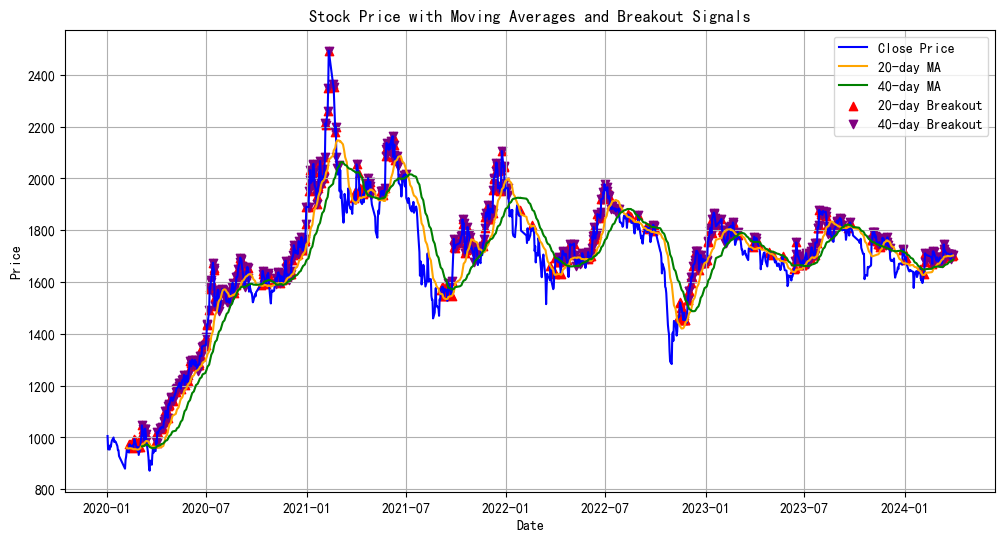

In [5]:
import tushare as ts
import pandas as pd
import matplotlib.pyplot as plt

# 设置Tushare Pro的API令牌
ts.set_token('1e2001e3788a053b7f1eacc6244ca7a9d4fc069d10a1647268b35023')

# 初始化Tushare Pro接口
pro = ts.pro_api()

# 获取股票数据
stock_code = '600519' 
start_date = '2020-01-01'
end_date = '2024-03-31'
df = ts.get_k_data(stock_code, start=start_date, end=end_date)
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# 第二步：构建通道突破策略
# 我们将使用简单移动平均线来构建通道，通常会包括20日和40日两条移动平均线

# 计算20日和40日的移动平均线
df['MA20'] = df['close'].rolling(window=20).mean()
df['MA40'] = df['close'].rolling(window=40).mean()

# 判断通道突破的信号
df['20日突破'] = df['close'] > df['MA20']
df['40日突破'] = df['close'] > df['MA40']

# 第三步：比较20日和40日的通道突破策略的获胜率
# 在这里，我们简单地计算20日和40日突破信号出现的次数，并比较胜率

# 计算20日突破信号出现的次数
num_20_day_breakouts = df['20日突破'].sum()

# 计算40日突破信号出现的次数
num_40_day_breakouts = df['40日突破'].sum()

# 计算胜率
win_rate_20_day = num_20_day_breakouts / len(df)
win_rate_40_day = num_40_day_breakouts / len(df)

print("20日通道突破策略的获胜率：", win_rate_20_day)
print("40日通道突破策略的获胜率：", win_rate_40_day)

# 绘制股价走势和移动平均线
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['close'], label='Close Price', color='blue')
plt.plot(df.index, df['MA20'], label='20-day MA', color='orange')
plt.plot(df.index, df['MA40'], label='40-day MA', color='green')

# 标记通道突破信号点
plt.scatter(df.index[df['20日突破']], df['close'][df['20日突破']], marker='^', color='red', label='20-day Breakout')
plt.scatter(df.index[df['40日突破']], df['close'][df['40日突破']], marker='v', color='purple', label='40-day Breakout')

plt.title('Stock Price with Moving Averages and Breakout Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()